# Load data

In [1]:
# Import libs

# Libs for modeling
import numpy as np
import pandas as pd
import random

# Libs for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Lib to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
dataset = pd.read_csv('credit_data.csv')
dataset.shape

(2000, 5)

In [3]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# null analysis
dataset.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

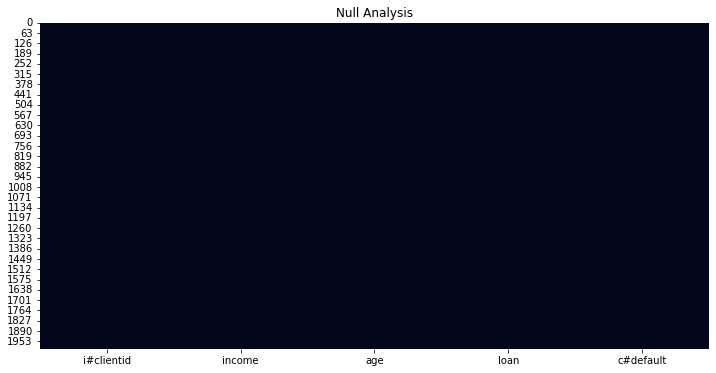

In [5]:
# null analysis
plt.figure( figsize=(12,6))
plt.title('Null Analysis')
sns.heatmap( dataset.isnull(), cbar=False );

In [6]:
# delete rows with empty age
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [7]:
# c#default analysis
dataset.groupby('c#default')['c#default'].count()

c#default
0    1714
1     283
Name: c#default, dtype: int64

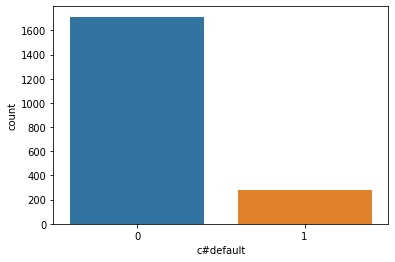

In [8]:
# c#default analysis
sns.countplot(dataset['c#default']);

# Split dataset

In [9]:
# split dataset into x and y sets
X = dataset.iloc[:, 1:4].values
X.shape

(1997, 3)

In [10]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [11]:
Y = dataset.iloc[:, 4].values
Y.shape

(1997,)

In [12]:
Y

array([0, 0, 0, ..., 1, 0, 0])

In [13]:
# import sklearn to train our model
from sklearn.model_selection import train_test_split

In [14]:
# create training and test
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [15]:
X_training.shape, Y_training.shape

((1597, 3), (1597,))

In [16]:
X_test.shape, Y_test.shape

((400, 3), (400,))

In [17]:
# check percentage between the splitted dataset
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [18]:
1714 / len(dataset), 283 / len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [19]:
np.unique(Y_training, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [20]:
226 / len(Y_training)

0.14151534126487164

In [21]:
np.unique(Y_test, return_counts=True)

(array([0, 1]), array([343,  57]))

In [22]:
57 / len(Y_test)

0.1425

# Classification 

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
model = GaussianNB()
model.fit(X_training, Y_training)

GaussianNB()

In [25]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [26]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(predicted, Y_test)

0.92

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(predicted, Y_test)
cm

array([[335,  24],
       [  8,  33]])

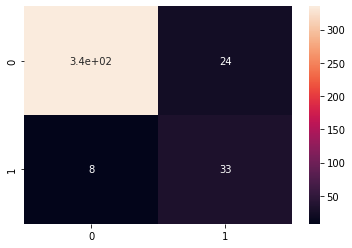

In [31]:
sns.heatmap( cm, annot=True);

In [32]:
# check model accuracy

total_valid = cm[0,0] + cm[1,1]
total_errors = cm[0,1] + cm[1,0]
total_total = total_valid + total_errors

type_1_valid = cm[0,0]
type_1_errors = cm[0,1]
type_1_total = type_1_valid + type_1_errors

type_2_valid = cm[1,1]
type_2_errors = cm[1,0]
type_2_total = type_2_valid + type_2_errors


print(
    "Model accuracy"
    "\n        Valid - Errors - %%"
    "\nTotal : %2i - %2i - %2.2f%%" % (total_valid, total_errors, total_valid/total_total*100),
    "\nType 1: %2i - %i - %2.2f%%" % (type_1_valid, type_1_errors, type_1_valid/type_1_total*100),
    "\nType 2: %2i - %2i - %2.2f%%" % (type_2_valid, type_2_errors, type_2_valid/type_2_total*100),
)

Model accuracy
        Valid - Errors - %
Total : 368 - 32 - 92.00% 
Type 1: 335 - 24 - 93.31% 
Type 2: 33 -  8 - 80.49%


In [33]:
# Model accuracy may be quite high when we look into the total number of cases. 
# But when we dig into the different categories, we see that the model did not work so well in predicting the type 2 cases.

# Undersampling and Oversampling

In [34]:
# undersampling

from imblearn.under_sampling import TomekLinks

In [35]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, Y)

In [36]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [37]:
# original dataset
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [38]:
# undersampling set (with reduced cases for the majority class)
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [39]:
# create training and test
X_training_u, X_test_u, y_training_u, y_test_u = train_test_split(X_under, y_under, test_size = 0.2, stratify = y_under)

X_training_u.shape, X_test_u.shape

((1517, 3), (380, 3))

In [40]:
model_u = GaussianNB()
model_u.fit(X_training_u, y_training_u)
predicted_u = model_u.predict(X_test_u)
accuracy_score(y_test_u,predicted_u ) 

0.9263157894736842

In [41]:
cm_u = confusion_matrix(predicted_u,y_test_u)
cm_u

array([[315,  20],
       [  8,  37]])

In [42]:
# check model accuracy

total_valid_u = cm_u[0,0] + cm_u[1,1]
total_errors_u = cm_u[0,1] + cm_u[1,0]
total_total_u = total_valid_u + total_errors_u

type_1_valid_u = cm_u[0,0]
type_1_errors_u = cm_u[0,1]
type_1_total_u = type_1_valid_u + type_1_errors_u

type_2_valid_u = cm_u[1,1]
type_2_errors_u = cm_u[1,0]
type_2_total_u = type_2_valid_u + type_2_errors_u


print(
    "Model accuracy"
    "\n        Valid - Errors - %%"
    "\nTotal : %2i - %2i - %2.2f%%" % (total_valid_u, total_errors_u, total_valid_u/total_total_u*100),
    "\nType 1: %2i - %i - %2.2f%%" % (type_1_valid_u, type_1_errors_u, type_1_valid_u/type_1_total_u*100),
    "\nType 2: %2i - %2i - %2.2f%%" % (type_2_valid_u, type_2_errors_u, type_2_valid_u/type_2_total_u*100),
)

Model accuracy
        Valid - Errors - %
Total : 352 - 28 - 92.63% 
Type 1: 315 - 20 - 94.03% 
Type 2: 37 -  8 - 82.22%


In [43]:
# check model accuracy

print(
    "Model accuracy - Original model versus Undersampling"
    "\nTotal : %2.2f%% - %2.2f%%" % (total_valid/total_total*100, total_valid_u/total_total_u*100),
    "\nType 1: %2.2f%% - %2.2f%%" % (type_1_valid/type_1_total*100, type_1_valid_u/type_1_total_u*100),
    "\nType 2: %2.2f%% - %2.2f%%" % (type_2_valid/type_2_total*100, type_2_valid_u/type_2_total_u*100),
)

Model accuracy - Original model versus Undersampling
Total : 92.00% - 92.63% 
Type 1: 93.31% - 94.03% 
Type 2: 80.49% - 82.22%


In [44]:
# oversampling

from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, Y)

In [46]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [47]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [48]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [49]:
X_training_o, X_test_o, y_training_o, y_test_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [50]:
X_training_o.shape, X_test_o.shape

((2742, 3), (686, 3))

In [51]:
model_o = GaussianNB()
model_o.fit(X_training_o, y_training_o)
predicted_o = model_o.predict(X_test_o)
accuracy_score(y_test_o,predicted_o ) 

0.9198250728862973

In [52]:
cm_o = confusion_matrix(predicted_o,y_test_o)
cm_o

array([[302,  14],
       [ 41, 329]])

In [53]:
# check model accuracy

total_valid_o = cm_o[0,0] + cm_o[1,1]
total_errors_o = cm_o[0,1] + cm_o[1,0]
total_total_o = total_valid_o + total_errors_o

type_1_valid_o = cm_u[0,0]
type_1_errors_o = cm_u[0,1]
type_1_total_o = type_1_valid_u + type_1_errors_o

type_2_valid_o = cm_o[1,1]
type_2_errors_o = cm_o[1,0]
type_2_total_o = type_2_valid_o + type_2_errors_o


print(
    "Model accuracy"
    "\n        Valid - Errors - %%"
    "\nTotal : %2i - %2i - %2.2f%%" % (total_valid_o, total_errors_o, total_valid_o/total_total_o*100),
    "\nType 1: %2i - %i - %2.2f%%" % (type_1_valid_o, type_1_errors_o, type_1_valid_o/type_1_total_o*100),
    "\nType 2: %2i - %2i - %2.2f%%" % (type_2_valid_o, type_2_errors_o, type_2_valid_o/type_2_total_o*100),
)

Model accuracy
        Valid - Errors - %
Total : 631 - 55 - 91.98% 
Type 1: 315 - 20 - 94.03% 
Type 2: 329 - 41 - 88.92%


In [54]:
# check model accuracy

print(
    "Model accuracy"
    "\nOriginal model versus Undersampling and Oversampling"
    "\nTotal : %2.2f%% - %2.2f%% - %2.2f%%" % (total_valid/total_total*100, total_valid_u/total_total_u*100, total_valid_o/total_total_o*100),
    "\nType 1: %2.2f%% - %2.2f%% - %2.2f%%" % (type_1_valid/type_1_total*100, type_1_valid_u/type_1_total_u*100, type_1_valid_o/type_1_total_o*100),
    "\nType 2: %2.2f%% - %2.2f%% - %2.2f%%" % (type_2_valid/type_2_total*100, type_2_valid_u/type_2_total_u*100, type_2_valid_o/type_2_total_o*100),
)

Model accuracy
Original model versus Undersampling and Oversampling
Total : 92.00% - 92.63% - 91.98% 
Type 1: 93.31% - 94.03% - 94.03% 
Type 2: 80.49% - 82.22% - 88.92%


In [ ]:
# We can make our model more accurate when applying the undersampling or oversampling techniques